Implementing Decision Tree Regression ML Algorithm on the Boston Housing Dataset

In [2]:
#import necessary libraries
import pandas as pd #to handle dataframes
import numpy as np #for numerical calculations on array
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots

from sklearn.model_selection import train_test_split #to divide dataset into training and testing
from sklearn.tree import DecisionTreeRegressor , plot_tree #to implement decision tree regressor algo
from sklearn.metrics import mean_squared_error, r2_score #r2 score is variance of data

In [3]:
#load dataset
df= pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Explanation of dataset:
Explanation of the fields in dataset:


---
* CRIM : Crime rate per capita

* ZN : Proportion of residential land zoned for large lots

* INDUS : Proportion of non-retail business acres

* CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX : Nitric oxide concentration (parts per 10 million)

* RM : Average number of rooms per dwelling

* AGE : Proportion of owner-occupied units built before 1940

* DIS : Weighted distances to five Boston employment centers

* RAD : Index of accessibility to radial highways

* TAX : Full-value property-tax rate per $10,000

* PTRATIO : Pupil-teacher ratio by town

* B : 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents

* LSTAT : % lower status of the population

* MEDV : (Target) Median value of owner-occupied homes in $1000s

In [4]:
#derive stats from data
df.info() #basic info
df.describe() #statistical summary
df.isnull().sum() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


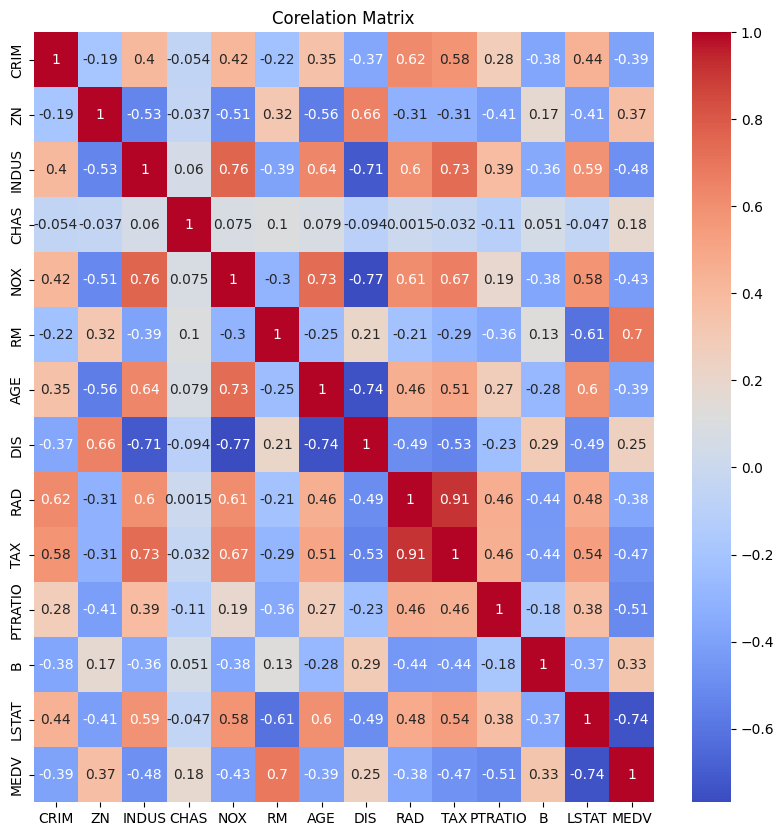

In [5]:
#visualize corelation matrix using heatmap
plt.figure(figsize=(10,10))
plt.title('Corelation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
#prep data for training
X= df.drop('MEDV', axis=1)
y= df['MEDV']

#train-test-split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#train the decision tree regressor
model= DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
#evaluate the model
y_pred= model.predict(X_test)

#evaluate parameters
r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8275797946608128
Mean Squared Error: 12.074094488188978


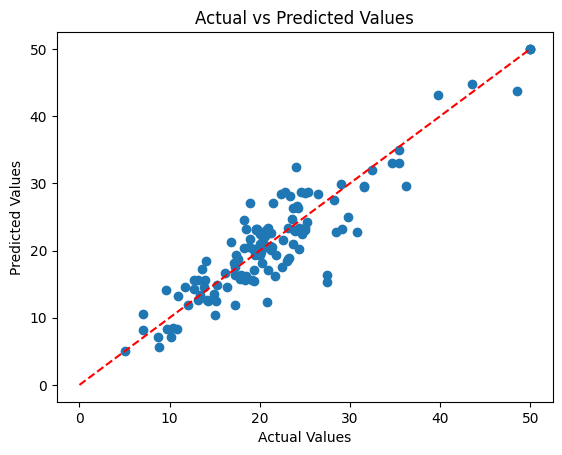

In [13]:
#visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0, 50], [0, 50], '--r')
plt.title('Actual vs Predicted Values')
plt.show()

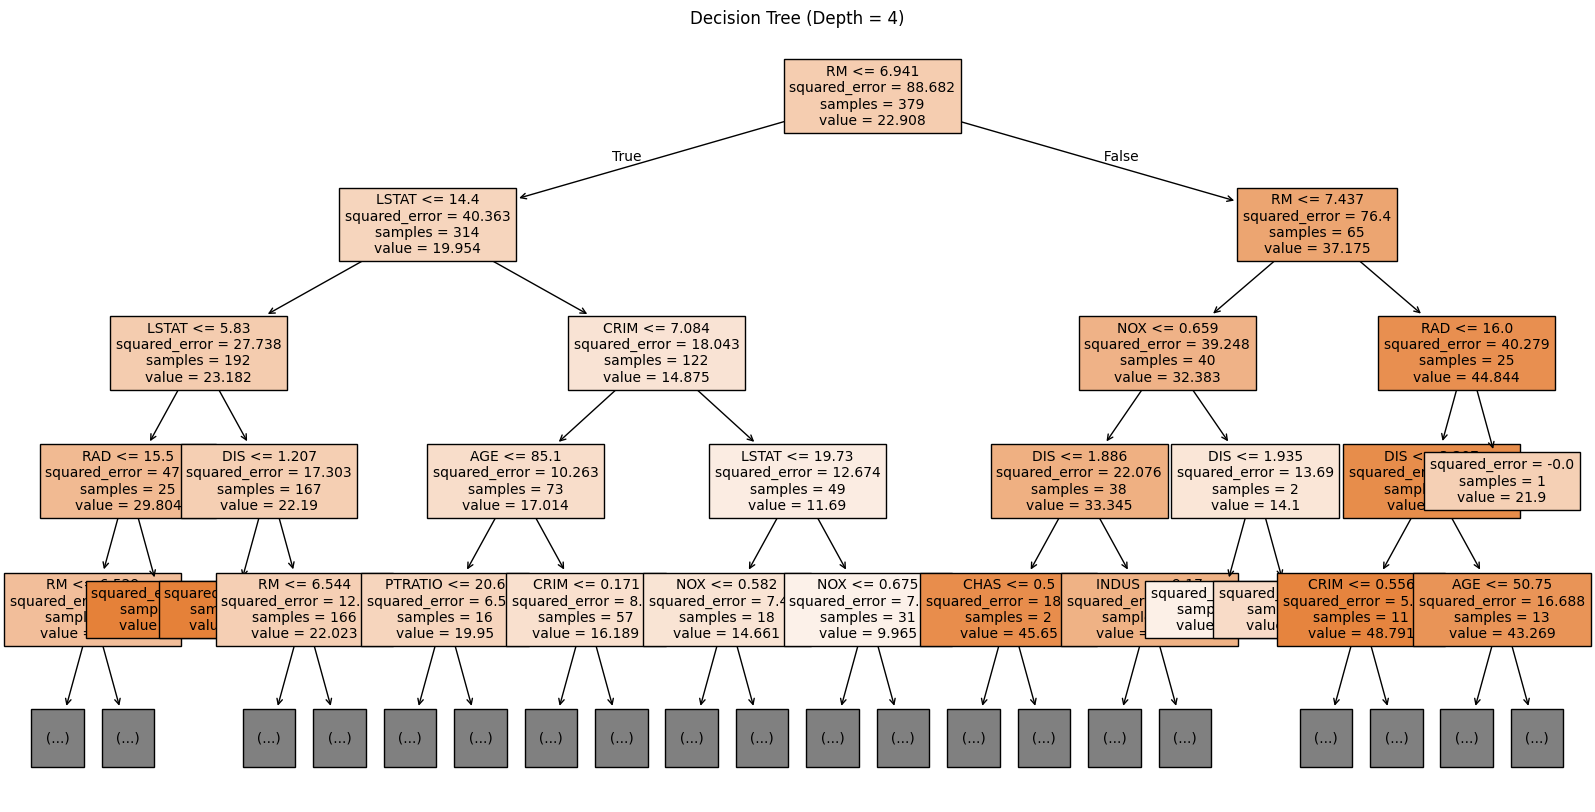

In [20]:
#visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=4, fontsize=10)
plt.title('Decision Tree (Depth = 4)')
plt.show()